<a href="https://colab.research.google.com/github/lapnguyen331/machine_leaning_lab/blob/main/Lab6_PCA_FeatureSelection_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#0. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#1. Đọc dataset iris từ datasets trong sklearn
Thêm thuộc tính **as_frame=True** để dữ liệu có được là một DataFrame

In [ ]:

dataset = datasets.load_iris(as_frame=True)
X=dataset['data']
y=dataset['target']

In [ ]:
len(X.columns)

4

#2. Áp dụng PCA cho tất cả các thuộc tính

In [ ]:
# feature extraction
pca = PCA()
fit = pca.fit(X)

#3. Hiển thị thông tin explained_variance cho các thành phần chính

In [ ]:
explained_variance=pca.explained_variance_ratio_#% thông tin của dữ liệu gốc được giữ lại bởi các thành phần chính này.
print(explained_variance)

[0.92461872 0.05306648 0.01710261 0.00521218]


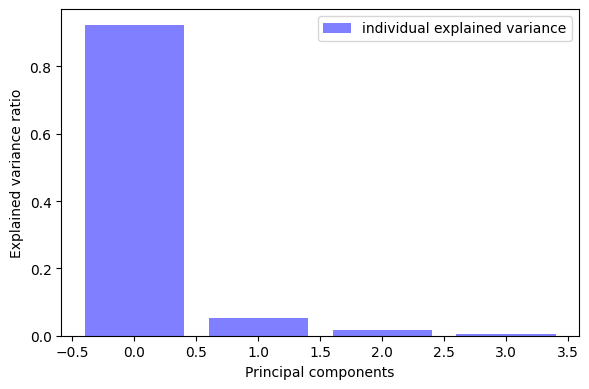

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(range(len(X.columns)), explained_variance, alpha=0.5, align='center',
            label='individual explained variance', color='blue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')# best: vị trí tốt nhất để hiển thị legend của biểu đồ
plt.tight_layout()

#4. Giữ lại số lượng thành phần chính theo kết quả ở trên

In [ ]:
pca=PCA(n_components=3)#giữ lại 3 thành phần chính
X_new=pca.fit_transform(X)

#5. Phân chia tập train và tập test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

#6. Xây dựng mô hình kNN với k=7

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# Đánh giá kết quả mô hình trên tập train và tập test sử dụng hàm score

In [ ]:
print("Tập train",knn_pca.score(X_train,y_train),"%") #Return the mean accuracy on the given test data and labels.
print("Tập test",knn_pca.score(X_test,y_test),"%")

Tập train 0.9619047619047619 %
Tập test 0.9777777777777777 %


#7. Sử dụng mô hình đã huấn luyện cho tập test

In [ ]:
y_pred = knn_pca.predict(X_test)

#8. Đánh giá mô hình phân lớp

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 measure:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9814814814814815
F1 measure: 0.9781305114638448
